# Introduction

Sabermetrics is the empirical analysis of baseball, primarily focusing on baseball statistics that measure in game activity. 
Sabermetrics was not highly regarded by Major League Baseball teams until 2002, when the Oakland A's used advanced analytics to 
build a roster that could compete with big market teams, despite having a payroll half the size. 
By diving into the use of sabermetrics, I wanted to understand what variables teams should value most in builidng a successful
roster. Ideally, I would apply this research as an example of player development and general management of a franchise. 

Specifically, I wanted to focus on the following questions: 
    1)What do successful teams do better than their competitors?
    2)How important is payroll in building sustained success.
My hypothesis follows general logic about the game. The team that scores the most runs wins more frequently, and home runs
result in guaranteed offensive production. The problem with building a team is payroll. Home run hitters are a scarce and 
valuable asset, making them extremely expensive to obtain unless a team has deep pockets. I hypothesize that teams with 
the largest payroll consistently sustain success due to their power to pay the best home run hitters in the game. 

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
%matplotlib inline

# Describe your dataset.

In this project I will be studying 2 datasets on MLB Teams and MLB players. The first data set called Teams will be referred 
to as batting, primarily due to my focus on the offensive production of each team. The original dataset contains the stats for
every baseball team dating back to 1871. The information contained in this file includes the stats for each team
for each year of recorded league play. Since 1871, MLB has changed significantly, adding teams (30), refining the dimensions of
the field, and changing the rules to improve the game. This study will primarily focus on MLB since 19819, dating back to the when the season increased to 140 games.

Notable changes that have occured within Major League Baseball since 1919 would include:
Integration starting in 1947
Team expansion to starting in 1961 with 18 teams, and  growing to 30 teams by 1998
1925 minimum homerun distance became 250 feet
Shrunken strike zone in 1969 from armpits to knees
MLB bans performance enhancing drugs in 1991, but testing for PED's began in 2003


In [209]:
pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Teams.csv')
batting= pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Teams.csv')
batting= pd.DataFrame(batting)
#I deleted te following columns in order to clean the data frame of unnecessary information.
del batting['teamIDBR']
del batting['teamIDlahman45']
del batting['teamIDretro']

batting.set_index('yearID').head()

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF
yearID,,,,,,,,,,,,,,,,,,,,,
1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,...,42,23,225,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98
1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,...,28,22,218,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102
1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,...,53,34,223,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100
1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,...,21,17,163,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107
1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,...,42,22,227,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88


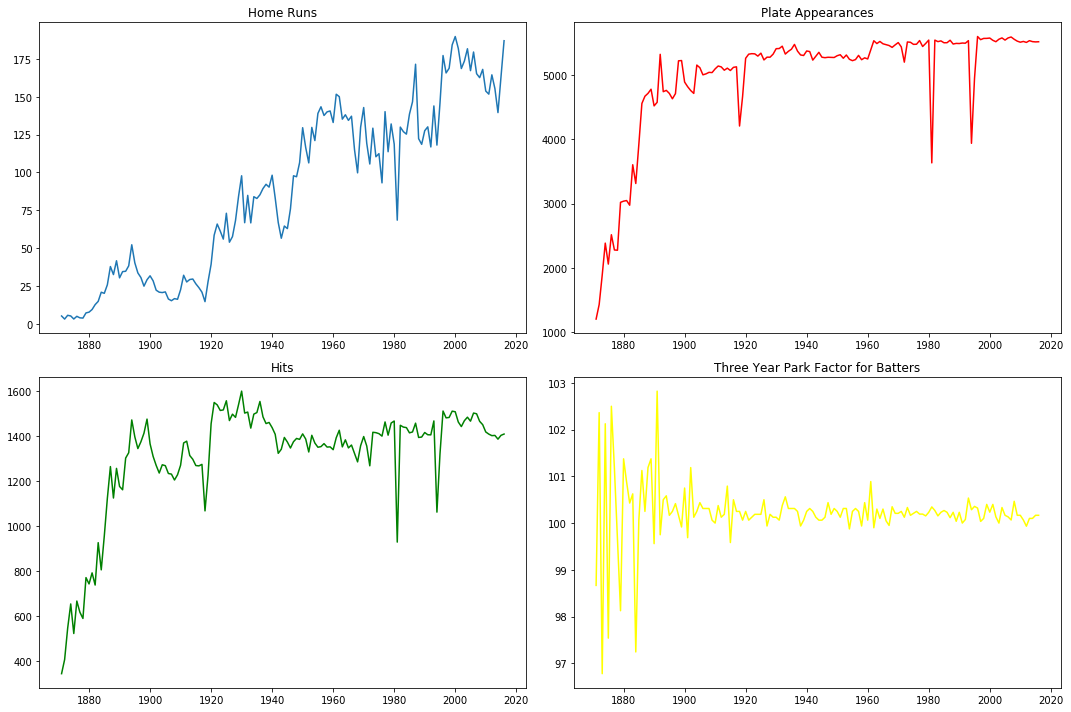

In [210]:
avgbatting=batting.groupby('yearID').mean()
avgbatting=pd.DataFrame(avgbatting)

f, axarr=plt.subplots(2,2, figsize=(15,10))
axarr[0,0].plot(avgbatting['HR'])
axarr[0,0].set_title('Home Runs')
axarr[0,1].plot(avgbatting['AB'], color='red')
axarr[0,1].set_title('Plate Appearances')
axarr[1,0].plot(avgbatting['H'], color='green')
axarr[1,0].set_title('Hits')
axarr[1,1].plot(avgbatting['BPF'], color='yellow')
axarr[1,1].set_title('Three Year Park Factor for Batters')


f.tight_layout()

To answer my first question, I need to know how baseball has trended in offensive production. By analyzing how baseball has progressed over it's history, understanding what builds a winning team will become clearer as teams gather more knowledge and talent improves throughout history.

These subplots aggregate the team average for each year, showing a consistent trend that home runs have been increasing 
at a steady rate. This can be caused by several different factors, but is most likely due to improvement in talent, mechanics, 
strength and conditioning. 
Plate appearances could be a reason, but this average has been steady since MLB increased the season to 140 games in 1919,
154 games in 1920 and 162 games in 1961. 
One could argue that pitchers have become significantly worse over time, but Hits have been fluctuating around 1400 following 1940. 
Three Year Park Factor for Batters measures how favorable the ball park is to hitters, with values greater than 100 indicating
parks that are favorable to batters. While this average is very volatile in the early days of baseball, the dimensions
of the field became standardized in 1919, which resulted in less variability from park to park. 
The major dips in both home runs and plate appearances following 1961 are due to lockout seasons that resulted in 
canceled games during the 1981, 1994, and 1995 seasons.

What is apparent throughout these subplots is that homeruns have increased over time, due to the improvement of teams in player development. But, do more homeruns mean more offensive production? There could be an inverse relationship due to the fact that hitting for power often comes at the cost of hitting for average. 

In [212]:
batting=pd.DataFrame(batting)
win_percentage = batting['W']/batting['G']
batting['Win Percentage'] = win_percentage
#Win percentage is a function of wins/ games played.

walk_percentage=batting['BB']/batting['AB']
batting['Walk%']=walk_percentage

so_percentage=batting['SO']/batting['AB']
batting['K%']=so_percentage


strikeouts_per_walks= batting['SOA']/batting['BBA']
batting['K/BB']= strikeouts_per_walks
#Strike outs per walks provides the ratio of the other outcomes that do not result in a hit. 
whip=(batting['BBA']+batting['HA'])/(batting['G']*9)
batting['WHIP']=whip


battingavg= batting['H']/batting['AB']
batting['Batting Avg']=battingavg
#batting average is the mean of how often a team can product a hit given a certain amount of at bats.

homerun_mean= batting['HR']-(batting['HR'].mean())

batting['HR avg'] = homerun_mean
batting.head()

obp= (batting['H']+batting['BB']+batting['HBP'])/(batting['HBP']+batting['AB']+batting['HBP']+batting['SF'])
batting['OBP']= obp
#On base percentage provides a ratio for how frequently a team reaches base, with exclusion of intentional base on balls. 

singles=batting['H']-batting['HR']-batting['3B']-batting['2B']
batting['1B']=singles

totalbases= singles+(2*batting['2B'])+(3*batting['3B'])+(4*batting['HR'])
slg=totalbases/batting['AB']
batting['SLG']=slg

batting['OPS']=batting['SLG']+batting['OBP']

walkpercentage= batting['BB']/batting['AB']
batting['Walk %']=walkpercentage

kpercentage=batting['SO']/batting['AB']
batting['SO%']=kpercentage



wOBA=(.690*batting['BB']+.722*batting['HBP']+.888*singles+1.271*batting['2B']+1.616*batting['3B']+2.101*batting['HR'])/(batting['AB']+batting['BB']+batting['SF']+batting['HBP'])
batting['wOBA']=wOBA

#wOBA is most accurate measure of offensive production because it weighs walks, singles, doubles, triples, and homerun's differently
batting.set_index('yearID').head()

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,WHIP,Batting Avg,HR avg,OBP,1B,SLG,OPS,Walk %,SO%,wOBA
yearID,,,,,,,,,,,,,,,,,,,,,
1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,...,1.465950,0.310496,-99.04515,NaN,316,0.422012,NaN,0.043732,0.013848,NaN
1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,...,1.333333,0.270067,-92.04515,NaN,240,0.373746,NaN,0.050167,0.018395,NaN
1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,...,1.528736,0.276560,-95.04515,NaN,246,0.391231,NaN,0.021922,0.021079,NaN
1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,...,1.649123,0.238606,-100.04515,NaN,149,0.293566,NaN,0.044236,0.012064,NaN
1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,...,1.397306,0.287037,-101.04515,NaN,338,0.349715,NaN,0.023504,0.010684,NaN


Advanced Stats

I've added several variables provided by Fangraphs that allow me to provide better analysis of offensive production. While the slashline of batting average/on-base percentage/slugging was the norm for analyzing offensive production, sabermetrics has explored several new metrics that provide more accuracy. The following metrics have been added:

Win Percentage: Wins/Games Played provides the ratio to how often a team won during the season

Walk Percentage: Base on Balls/At Bats is the ratio to how frequently a team generates walks

Strikeout Percentage: Strikeout's/At Bats is ratio to how frequently a team strikes out

K/BB= Strikeouts/Walks is the ratio of teams strike outs to walks. Frequently used to measure how a team is performing without hits.

WHIP= Walks+Hits per inning pitched, which measures how many base runners a team allows per inning. Limiting base runners is key to preventing your opponent from scoring

OBP=On base percentage, or the percentage of at bats that result in a batter reaching base, either by a hit or a walk.

SLG=Average number of total bases per at bat, calculated as Total Bases/AB.

OPS= Combination of OBP and SLG, calculated as OBP+SLG. Many sabermetricians don’t like OPS because it treats OBP as equal in value with SLG, while OBP is roughly twice as important as SLG in terms of its effect on run scoring (x1.8 to be exact). However, OPS has value as a metric because it is accepted and used more widely than other, more accurate statistics while also being a relatively accurate representations of offense. 

wOBA= Weighted On-Base Average (wOBA) is one of the most important and popular catch-all offensive statistics. Weighted On-Base Average combines all the different aspects of hitting into one metric, weighting each of them in proportion to their actual run value. While batting average, on-base percentage, and slugging percentage fall short in accuracy and scope, wOBA measures and captures offensive value more accurately and comprehensively.

These advanced metrics will be used to perform the analysis to address my 2 questions.



In [213]:
batting=batting[batting['yearID']>=1919]

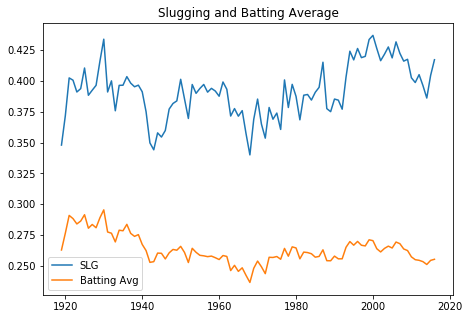

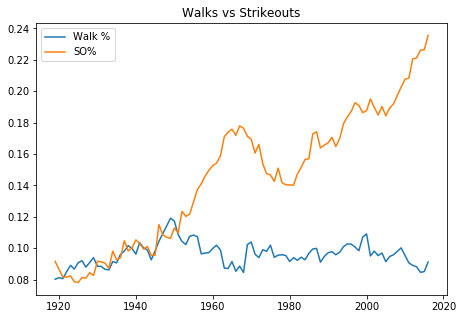

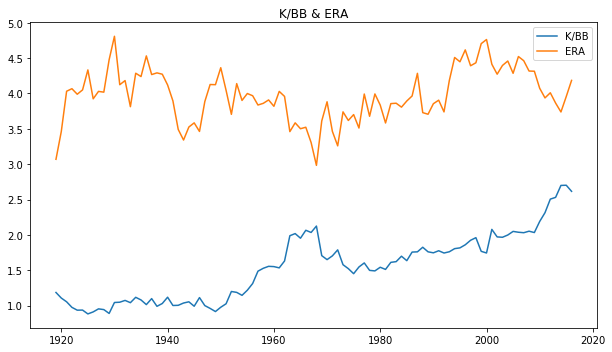

In [214]:
avgbatting=batting.groupby('yearID').mean()
avgbatting=pd.DataFrame(avgbatting)

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.plot(avgbatting['SLG'])
plt.plot(avgbatting['Batting Avg'])
plt.title('Slugging and Batting Average')
plt.legend()

plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
plt.plot(avgbatting['Walk %'])
plt.plot(avgbatting['SO%'])
plt.title('Walks vs Strikeouts')
plt.legend()

plt.figure(figsize=(25,5))
plt.subplot(1,3,3)
plt.plot(avgbatting['K/BB'])
plt.plot(avgbatting['ERA'])
plt.title('K/BB & ERA')
plt.legend()

plt.tight_layout()

plt.show()

These four graphs display how baseball has progressed as players and teams have improved. 

The first graph compares slugging to batting average, and show that while batting average has declined over time,
slugging has actually increased. This indicates that batters have actually become more aggresive at the plate, sacrificing 
consistency for power.

The second graph compares walks to strike outs, and shows a clear inverse relationshp between the two. Walks have been in
decline, while strikeouts have been consistently increasing. This fits the narrative that batters have become more aggresive. It
is a fundamental understanding within baseball that hitting for power increases strike outs because batters are more willing
to swing at difficult pitches to hit in an attempt to hit the ball harder. As teams have become smarter, batters have learned the value of hitting the long ball.

The third graph compares the ratio of strikeouts/walks to earned run average. This is a pitching stat, but it is important to observe how the the defensive side of the sport has progressed. This graph shows that K/BB agrees with my 
second graph, but the more interesting plot is ERA. ERA almost perfectly mimics SLG, rising/declining in unison. This shows
the true value in power hitting, because hitting for more bases results in more earned runs.


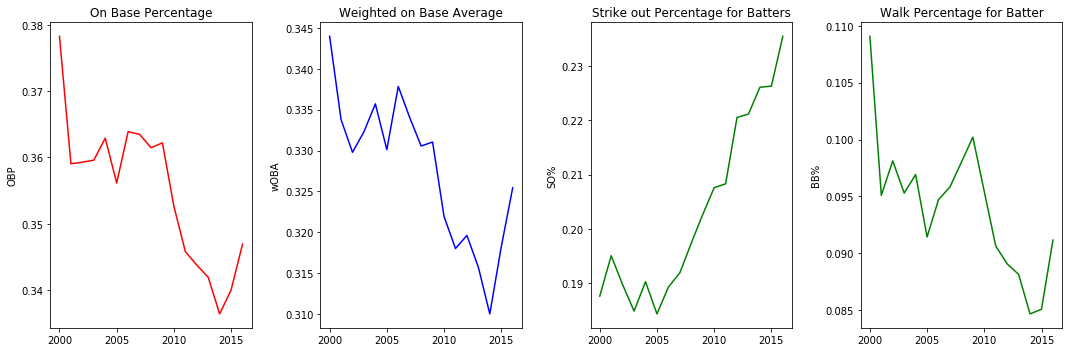

In [215]:
advancedbatting=batting[batting['yearID']>=2000]
advanced_avgbatting=advancedbatting.groupby('yearID').mean()

advanced_avgbatting=pd.DataFrame(advanced_avgbatting)
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.plot(advanced_avgbatting['OBP'], color='red')
plt.ylabel('OBP')
plt.title('On Base Percentage')

plt.subplot(1,4,2)
plt.plot(advanced_avgbatting['wOBA'], color='blue')
plt.ylabel('wOBA')
plt.title('Weighted on Base Average')

plt.subplot(1,4,3)
plt.plot(advanced_avgbatting['SO%'], color='green')
plt.ylabel('SO%')
plt.title('Strike out Percentage for Batters')

plt.subplot(1,4,4)
plt.plot(advanced_avgbatting['Walk%'], color='green')
plt.ylabel('BB%')
plt.title('Walk Percentage for Batter')

plt.tight_layout()
plt.show()


These graphs have limited data due to the fact that hit by pitch wasn't considered an official stat until 2000, but these graphs demonstrate the short term effect of sabermetrics. The early 2000's are the end of the steriod era, which resulted in a steep decline in offensive production.

Once steroid testing began, OBP and wOBA declined dramatically, as batters continued to try an hit in the same aggresive manner, but with less 'juice'. Strikeouts slightly declined as well, but the effects of steroids on pitchers isn't as potent because pitching is more of a finesse skill. 

The most interesting trend amongst these graphs is the most recent years as both on OBP and wOBA have begun to shoot up, even though strikeouts are still on the rise. This is due to a number of factors, but primarily due to a new generation of players once all the steroid era players have eventually aged out. While sabermetrics hadn't truely been implemented by teams till the late 2000's, scounting and player development changed. Team's have become smarter, finding the balance between a lineup full of power hitters, and an evenly balanced roster with players who can hit for power, and players who take a more patient approach and pursue walks. 



In [216]:
postszn  = np.where((batting['DivWin']=='Y') |
                     (batting['WCWin']=='Y') | 
                     (batting['LgWin']=='Y') | 
                     (batting['WSWin']=='Y'), 'Y', 'N')

batting['postseason']= postszn

The Difference Between Winners & Losers

In order to determine what's the difference between winning teams and losing teams, first I need to understand what seperates them. Win percentage is an obvious difference, and will be used to compare above average teams to below average teams. But the real question then becomes what is success? Simply finishing above .500 isn't the only goal of a franchise. Post season success is truly what defines greatness. In this part of my analysis, I've created a variable to determine post season success, which will include different tiers. 

The post season success consists of 4 tiers games:

Divisional Winners: MLB consists of 30 teams, seperated into 2 leagues (American League and National League), which is then seperated into 3 divisions. The teams with the most regular season wins in their division is the Divisional Winner, resulting in 6 winners each year.

Wild Card Wins: The 6 divisional winners are automatically granted a playoff berth, but the next two best teams in the AL and the NL are the Wild Card teams. The wild card consist of a one-game playoff. The winners of the wild card compete for a chance to play in the Division Series.

League Champions: The semifinal round of postseason play in Major League Baseball which has been conducted since 1969. The two annual series have matched up the winners of the Division Series, and the winners advance to meet in the World Series.

World Series Champions: The World Series is the annual championship series of Major League Baseball (MLB) in North America, contested since 1903 between the American League (AL) champion team and the National League (NL) champion team. The winner of the World Series championship is determined through a best-of-seven playoff, and the winning team is awarded the Commissioner's Trophy.


I will be using these tiers of success in my analysis to learn what is the difference between champions, and everyone else. While playoff success is ultimately random on a yearly basis, due to small sample size, important analysis can be done to find the commonality in what factors lead a team to climb the tiers of success. 

Text(0.5,1,'ERA for Mediocre Teams vs Post Season Teams')

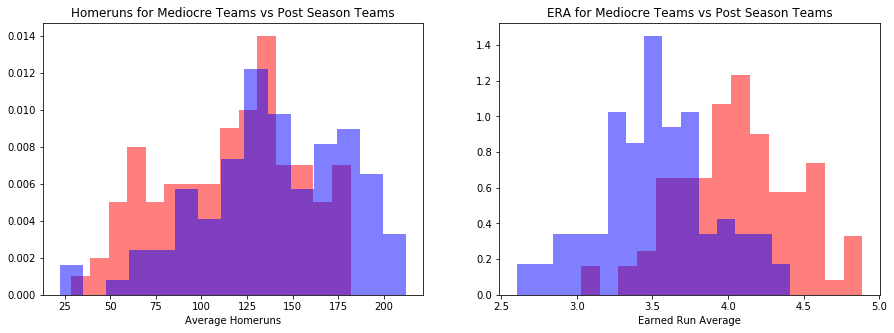

In [67]:
medbatting = batting[batting['postseason']=='N']
medbatting=pd.DataFrame(medbatting)

avgmedbatting=medbatting.groupby('yearID').mean()

postbatting = batting[batting['postseason']=='Y']

postavgbatting=postbatting.groupby('yearID').mean()
postavgbatting=pd.DataFrame(postavgbatting)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(avgmedbatting['HR'],bins=15,normed=True, color='red', alpha=.5)
plt.hist(postavgbatting['HR'],bins=15,normed=True, color='blue',alpha=.5)
plt.xlabel('Average Homeruns')
plt.title('Homeruns for Mediocre Teams vs Post Season Teams')


plt.subplot(1,2,2)
plt.hist(avgmedbatting['ERA'],bins=15,normed=True, color='red', alpha=.5)
plt.hist(postavgbatting['ERA'],bins=15,normed=True, color='blue',alpha=.5)
plt.xlabel('Earned Run Average')
plt.title('ERA for Mediocre Teams vs Post Season Teams')

In these two histograms, I compare home runs and ERA for teams without post season success against post season teams. While it can be noted that home runs and ERA show a normal distribution for all teams, successful post season teams display a stark difference. The distribution of the two stats is interesting, in that homeruns are skewed left, but ERA appears to have a normal distribution that is significantly shifted to the left of the distribution for all teams. This leads me to believe that while successful teams tend to hit more homeruns than their opponents on average, effective pitching is more consistent amongst successful teams.

Text(0.5,1,'WHIP for All Teams vs Post Season Teams')

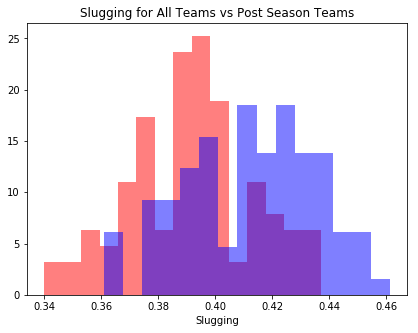

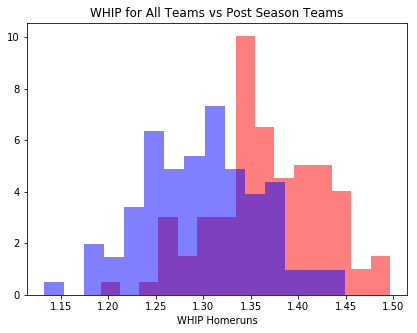

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(avgbatting['SLG'],bins=15,normed=True, color='red', alpha=.5)
plt.hist(postavgbatting['SLG'],bins=15,normed=True, color='blue',alpha=.5)
plt.xlabel('Slugging')
plt.title('Slugging for All Teams vs Post Season Teams')

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.hist(avgbatting['WHIP'],bins=15,normed=True, color='red', alpha=.5)
plt.hist(postavgbatting['WHIP'],bins=15,normed=True, color='blue',alpha=.5)
plt.xlabel('WHIP Homeruns')
plt.title('WHIP for All Teams vs Post Season Teams')


Upon seeing the difference in teams between homerun's and ERA, I created a histogram to plot the difference between playoff winners in a more reflective offensive stat, Slugging, and a defensive stat, WHIP. The difference between the two doesn't fully favor offensive or defensive production, with showing a significant difference in their ability to hit for high slugging percentages and prevent base runners. I'm going to need to find a better way to measure a consistent factor in what makes successful teams better. 


Text(0.5,1,'Weighted On Base Average')

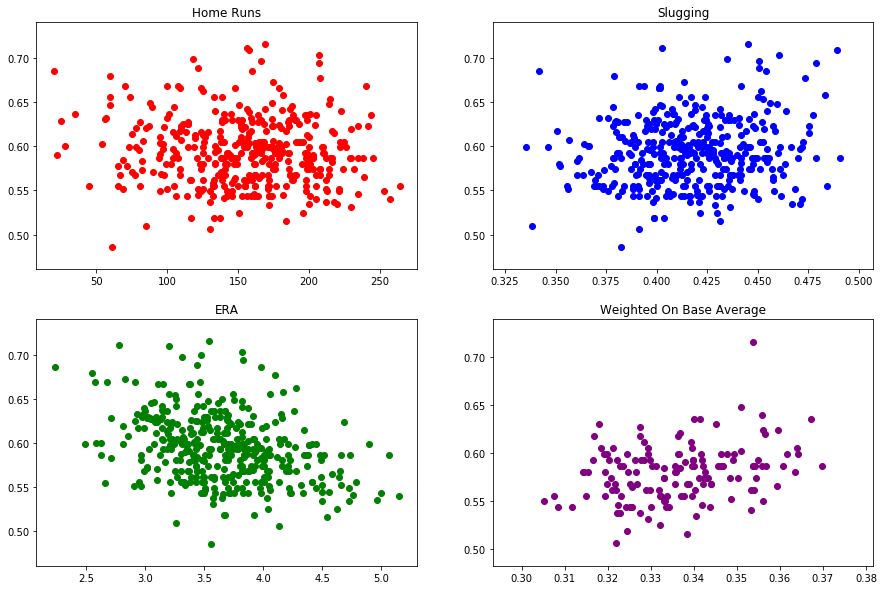

In [217]:
f, axarr=plt.subplots(2,2, figsize=(15,10))
axarr[0,0].scatter(postbatting['HR'],postbatting['Win Percentage'], color='red')
axarr[0,0].set_title('Home Runs')
axarr[0,1].scatter(postbatting['SLG'],postbatting['Win Percentage'], color='Blue')
axarr[0,1].set_title('Slugging')
axarr[1,0].scatter(postbatting['ERA'],postbatting['Win Percentage'], color='green')
axarr[1,0].set_title('ERA')
axarr[1,1].scatter(postbatting['wOBA'],postbatting['Win Percentage'], color='purple')
axarr[1,1].set_title('Weighted On Base Average')

In [218]:
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(postavgbatting['HR'][80:],postavgbatting['Win Percentage'][80:])
print (slope, intercept, r_value)

0.000238944879416 0.536028887258 0.32714702246


In [219]:
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(postavgbatting['SLG'][80:],postavgbatting['Win Percentage'][80:])
print (slope, intercept, r_value)

0.328130565458 0.439086987409 0.37712378803


In [220]:
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(postavgbatting['ERA'],postavgbatting['Win Percentage'])
print (slope, intercept, r_value)

-0.0265725077391 0.700142371946 -0.359116429001


In [221]:
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(postavgbatting['wOBA'][80:],postavgbatting['Win Percentage'][80:])
print (slope, intercept, r_value)

0.437020772532 0.432383912329 0.339469572349


## Coorelating Win Percentage

By plotting four stats against win percentage, I was able to find exactly how relavant certain statistics are for winning teams. The results were surprising in what stat provided the highest slope when using win percentage as the y value. I had intially believed that homeruns would be the primary driver behind win percentage, but wOBA had the greatest slope with win percentage. While wOBA is a general stat, that provides excellent insight into what winning teams have in common. While there has been a focus on hitting for power since 2000, a well balanced roster seems to be more closely coorelated to a winning franchise. The ideal batting lineup would consist of hitters who can not only hit for power, but also contribute by walking and hitting for average. 

What winning franchises have in common is a balanced roster, that can both produce offense using power but also through patient approaches that generate walks. 


# Payroll Analysis

The second data set is called Salaries and will be referred to as team_payroll in our study. Payroll contains the salary 
information for each player dating back to 1985. I am going to aggregate the total salary for each team by year in order to find the total payroll for each team. The goal of using payroll data is to see how influential money is in building  a successful baseball roster. My hypothesis is that team's with a greater payroll will have elevated homerun's and slugging than teams on the lwoer end of the payroll scale. 

In [238]:
pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Salaries.csv')
salaries=pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Salaries.csv')
salaries_aggr = salaries.groupby(['yearID','teamID'], as_index=False)['Salary'].sum()
salaries_aggr.head()

,yearID,teamID,Salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [239]:
team_payroll=pd.merge(batting, salaries_aggr, on=['yearID','teamID'])
team_payroll.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,HR avg,OBP,1B,SLG,OPS,Walk %,SO%,wOBA,postseason,Salary
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,23.95485,NaN,992,0.363011,NaN,0.100072,0.153637,NaN,N,14807000
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,111.95485,NaN,981,0.429763,NaN,0.109480,0.164582,NaN,N,11560712
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,59.95485,NaN,1130,0.429196,NaN,0.098252,0.142657,NaN,N,10897560
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,50.95485,NaN,965,0.385888,NaN,0.119074,0.165748,NaN,N,14427894
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,43.95485,NaN,956,0.392139,NaN,0.086106,0.154113,NaN,N,9846178


Payroll for teams is one of the most important areas for understanding the limitations on building a roster. Based on how much money is available to build a roster, payroll determines the level of talent a team can financially secure, which puts small market teams at a significant disadvantage. My current payroll data consist of the aggregate salary of teams for the years 1985-2016. While securing talent is important towards building a winning team, there are other ways to build a talented roster witha  limited payroll. 

In [240]:
team_payroll=team_payroll.sort_values(by=['Salary'])

team_payroll.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,HR avg,OBP,1B,SLG,OPS,Walk %,SO%,wOBA,postseason,Salary
76,1987,AL,TEX,TEX,W,6,162,81.0,75,87,...,91.95485,NaN,985,0.430266,NaN,0.101905,0.194285,NaN,N,880000
73,1987,AL,SEA,SEA,W,4,162,81.0,78,84,...,58.95485,NaN,1008,0.428468,NaN,0.090777,0.156681,NaN,N,2263500
21,1985,AL,SEA,SEA,W,6,162,83.0,74,88,...,68.95485,NaN,924,0.412244,NaN,0.102155,0.170621,NaN,N,4613000
102,1988,AL,TEX,TEX,W,6,161,81.0,70,91,...,9.95485,NaN,1000,0.368498,NaN,0.098923,0.186530,NaN,N,5342131
12,1985,AL,MIN,MIN,W,4,162,84.0,77,85,...,38.95485,NaN,989,0.406607,NaN,0.091124,0.141405,NaN,N,5764821


In [241]:
team_payroll.set_index('yearID')
team_payroll.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,HR avg,OBP,1B,SLG,OPS,Walk %,SO%,wOBA,postseason,Salary
875,2015,AL,NYA,NYY,E,2,162,81.0,87,75,...,109.95485,0.350444,894,0.420873,0.771317,0.099515,0.220406,0.327580,Y,212751957
871,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,84.95485,0.355736,870,0.412628,0.768364,0.104550,0.233612,0.326851,Y,215792000
841,2014,NL,LAN,LAD,W,1,162,81.0,94,68,...,31.95485,0.359127,1002,0.405755,0.764882,0.093345,0.224101,0.326494,Y,217014600
811,2013,NL,LAN,LAD,W,1,162,81.0,92,70,...,35.95485,0.350257,1011,0.396285,0.746541,0.086687,0.208705,0.319816,Y,223362196
815,2013,AL,NYA,NYY,E,4,162,81.0,85,77,...,41.95485,0.329345,906,0.375849,0.705193,0.085520,0.222793,0.303343,N,231978886


Text(0,0.5,'Payroll')

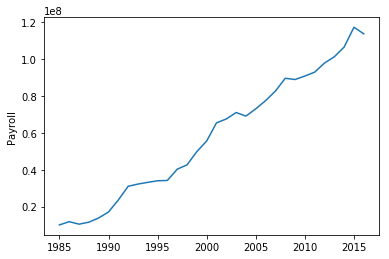

In [242]:
avg_payroll=team_payroll.groupby('yearID').mean()

plt.plot(avg_payroll['Salary'])
plt.ylabel('Payroll')

Similar to most sports leagues, as revenue has continued to climb, so has the payroll available for all the teams within the league. In order to address the issue of big market advantages, MLB intitiated a Revenue Sharing Program, requiring all team's  in the majors to pay in 31% of their net local revenue, and then that money is divided up and equally distributed to every team. Since large-market teams will have much greater local revenues than small market teams, this already puts small market teams in the black.

On top of this, a large chunk of MLB’s central fund (which are acquired through things like national broadcasts) is set aside to be allocated to teams based on their revenues.

By 2016, the fifteen teams in the largest markets in baseball will be disqualified from receiving revenue sharing. This feature is being phased in over the coming years. The disqualified clubs will receive a refund for the amount that they would have received in revenue sharing, although teams that have exceeded the Luxury Tax threshold in recent years will not receive a full refund. 

While Revenue Sharing clearly hurt's most small market teams, MLB has input a Luxury Tax in place of a salary cap in order to level the spending an individual team can spend on their roster. If a league lacks a salary cap or a luxury tax, any rich team can spend all the money they can afford on players. This means teams with smaller pockets cannot keep up with the richer teams, as they cannot afford the top talent, giving them a competitive disadvantage against the rich teams.This disadvantage calls for some sort of limitation on spending to make it a lot harder for the richer, bigger market teams, in order to spread the competitiveness across the league. In other professional sports leagues, there is usually a salary cap on what each team can spend on their players and they cannot go over that level. Major League Baseball decided to install a luxury tax instead to keep the competitive balance in the league. This means that at the beginning of each year, a threshold is set by the Commissioner's Office of Major League Baseball to how much a team can spend on their players. In Major League Baseball, their “competitive balance tax” allows teams to go over the threshold, but at a premium. The goal of this is to encourage big spending, but to still maintain a great balance in competition. Major League Baseball implemented the “competitive balance tax” in 1997, and it has undergone several changes since the beginning.

While my salary data is limited to 1985, the effect's of payroll on building a winning team will be observable within certain stats.

Text(0.5,0,'Payroll Scale')

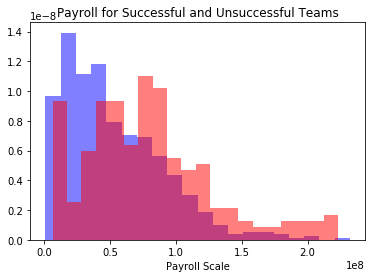

In [243]:
nonpost_team_payroll=team_payroll[team_payroll['postseason']=='N']
nonpost_team_payroll=pd.DataFrame(nonpost_team_payroll)

post_team_payroll = team_payroll[team_payroll['postseason']=='Y']
post_team_payroll=pd.DataFrame(post_team_payroll)
plt.hist(nonpost_team_payroll['Salary'], normed=True, bins=20, color='blue', alpha=.5)
plt.hist(post_team_payroll['Salary'], normed=True, bins=20, color='red', alpha=.5)
plt.title('Payroll for Successful and Unsuccessful Teams')
plt.xlabel('Payroll Scale')



The above graph illustrates a stark difference between successful teams and everyone else. While a number of team's with payroll's less than $500K have achieved post season success, there is a clear seperation between sucessful teams and unsuccessful teams. While there is an observable correlation between winning and payroll, this does not mean that the route to contention is through increasing a team's payroll. Smart franchises understand where they are in the building process, and may not use the full amount of their payroll if the talent isn't available. 

Text(0.5,1,'Successful Teams')

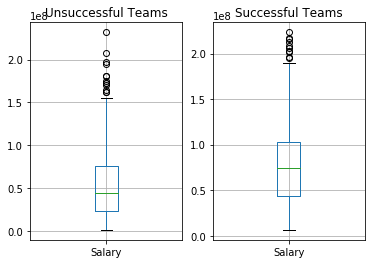

In [244]:
plt.subplot(1,2,1)
nonpost_team_payroll.boxplot('Salary')
plt.title('Unsuccessful Teams')
plt.subplot(1,2,2)
post_team_payroll.boxplot('Salary')
plt.title('Successful Teams')

These boxplots show us the comparative difference payroll makes for a team. While the minimum value hasn't changed significantly, indicating the possibility of a Cinderella story, the interquartile range has shifted dramatically. On average more unsuccessful teams have a payroll between $25M and $75M, while that range shifts significantly upwards for successful teams. The average successful team has a payroll between $45M and $110M.  

While payroll is clearly a factor in a teams success, what stat does payroll impact the most?


In [245]:
team_payroll=team_payroll.sort_values(by=['Salary'])
top_100_payroll=team_payroll.tail(n=100)
top_100_payroll.set_index('yearID')
bottom_100_payroll=team_payroll.head(n=100)
bottom_100_payroll.set_index('yearID')
bottom_100_payroll.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,HR avg,OBP,1B,SLG,OPS,Walk %,SO%,wOBA,postseason,Salary
76,1987,AL,TEX,TEX,W,6,162,81.0,75,87,...,91.95485,NaN,985,0.430266,NaN,0.101905,0.194285,NaN,N,880000
73,1987,AL,SEA,SEA,W,4,162,81.0,78,84,...,58.95485,NaN,1008,0.428468,NaN,0.090777,0.156681,NaN,N,2263500
21,1985,AL,SEA,SEA,W,6,162,83.0,74,88,...,68.95485,NaN,924,0.412244,NaN,0.102155,0.170621,NaN,N,4613000
102,1988,AL,TEX,TEX,W,6,161,81.0,70,91,...,9.95485,NaN,1000,0.368498,NaN,0.098923,0.186530,NaN,N,5342131
12,1985,AL,MIN,MIN,W,4,162,84.0,77,85,...,38.95485,NaN,989,0.406607,NaN,0.091124,0.141405,NaN,N,5764821


2.67887888667e-07 132.675543532 0.233474533377


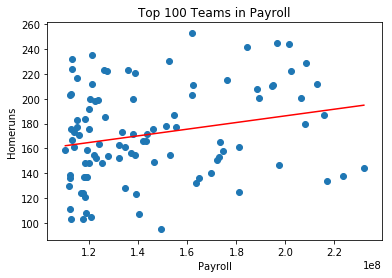

In [246]:
x=top_100_payroll['Salary']
y=top_100_payroll['HR']
fig, ax=plt.subplots()
fit=np.polyfit(x,y,deg=1)
ax.plot(x,fit[0]*x+fit[1],color='red')
ax.scatter(x,y)
plt.xlabel('Payroll')
plt.ylabel('Homeruns')
plt.title('Top 100 Teams in Payroll')
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(x,y)
print (slope, intercept, r_value)


-2.2455401268e-06 160.351552466 -0.152303405641


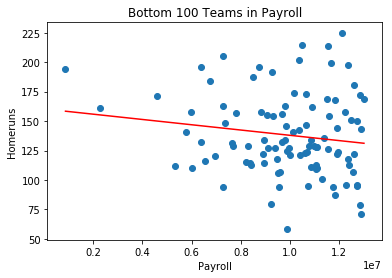

In [247]:
w=bottom_100_payroll['Salary']
z=bottom_100_payroll['HR']

fig, ax=plt.subplots()
fit=np.polyfit(w,z,deg=1)
ax.plot(w,fit[0]*w+fit[1],color='red')
ax.scatter(w,z)
plt.xlabel('Payroll')
plt.ylabel('Homeruns')
plt.title('Bottom 100 Teams in Payroll')
slope,intercept, r_value, p_value, std_err = stats.linregress(w,z)
print (slope, intercept, r_value)

In the above scatter plots, there is a clear difference in the number homeruns hit depending on payroll. In the first scatter plot, I show the linear regression for the top 100 teams in payroll and how that impacts homeruns. There is a clear connection, as the the top 100 team's display a positive trend for homerun's as payroll increases. The bottom 100 teams in payroll display a negative trend, which should be read inversley. As payrol decreased offensive production also decreases. 

-7.9966669707e-10 4.14536275386 -0.0641350541439


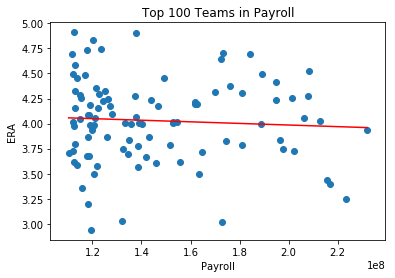

In [248]:
x=top_100_payroll['Salary']
y=top_100_payroll['ERA']
fig, ax=plt.subplots()
fit=np.polyfit(x,y,deg=1)
ax.plot(x,fit[0]*x+fit[1],color='red')
ax.scatter(x,y)
plt.xlabel('Payroll')
plt.ylabel('ERA')
plt.title('Top 100 Teams in Payroll')
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(x,y)
print (slope, intercept, r_value)

-5.96752699239e-08 4.55750941213 -0.297198135717


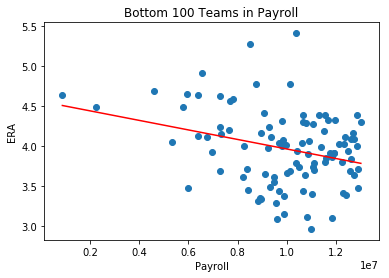

In [249]:
w=bottom_100_payroll['Salary']
z=bottom_100_payroll['ERA']

fig, ax=plt.subplots()
fit=np.polyfit(w,z,deg=1)
ax.plot(w,fit[0]*w+fit[1],color='red')
ax.scatter(w,z)
plt.xlabel('Payroll')
plt.ylabel('ERA')
plt.title('Bottom 100 Teams in Payroll')
slope,intercept, r_value, p_value, std_err = stats.linregress(w,z)
print (slope, intercept, r_value)

Similar to power hitters, effective pitchers are expensive talent to secure. The connection between payroll and ERA isn't as pronounced as it with offense. While teams on the lower end of the payroll scale have higher ERA's, the top 100 teams on the payroll scale do not see a significant improvement in ERA as payroll increases. This can be explained by understanding the market. While an effective pitcher is also an expensive asset for a team, starting pitchers only participate in 1/5 of games throughout the season due to the pitching rotation. A pitching rotation normally consists of 5 starting pitchers (1 for each day of the week). This mean's that although a team can secure some of the top pitching talent in the league, a team an easily front load their available payroll on 1-2 starting pitchers, resulting in a financial constraint that leads to mediocrity towards the back end of the pitching rotation. 

In [265]:
payroll_team=team_payroll.groupby('franchID').mean()
payroll_team=payroll_team.sort_values(['Salary'])
top_10_teams=payroll_team.tail(n=10)
bottom_10_teams=payroll_team.head(n=10)
top_10_teams.head()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,Batting Avg,HR avg,OBP,1B,SLG,OPS,Walk %,SO%,wOBA,Salary
franchID,,,,,,,,,,,,,,,,,,,,,
CHC,2000.0,3.903226,159.709677,80.000000,76.838710,82.774194,701.419355,5471.483871,1412.290323,269.000000,...,0.258083,61.019366,0.348628,949.000000,0.408068,0.762140,0.089836,0.196702,0.324607,6.373267e+07
SFG,2000.0,2.645161,159.870968,80.129032,83.064516,76.774194,710.548387,5446.967742,1409.741935,267.129032,...,0.258637,47.116140,0.355457,957.645161,0.403015,0.765556,0.096408,0.189388,0.325507,6.465983e+07
DET,2000.5,3.281250,159.843750,79.937500,76.687500,83.156250,754.187500,5492.937500,1449.531250,269.750000,...,0.263696,73.079850,0.355259,969.781250,0.421321,0.780897,0.097674,0.193935,0.332142,6.682372e+07
PHI,2000.5,3.250000,159.937500,80.125000,78.593750,81.281250,712.250000,5468.968750,1401.375000,272.906250,...,0.256219,48.298600,0.356909,942.437500,0.401275,0.770545,0.099862,0.199326,0.327612,6.728215e+07
ANA,2000.5,2.875000,159.968750,80.187500,82.843750,77.125000,740.125000,5480.000000,1451.156250,266.281250,...,0.264713,52.829850,0.354929,1002.250000,0.408190,0.772744,0.092364,0.177017,0.329338,6.818748e+07


(0.45, 0.59302558765478997)

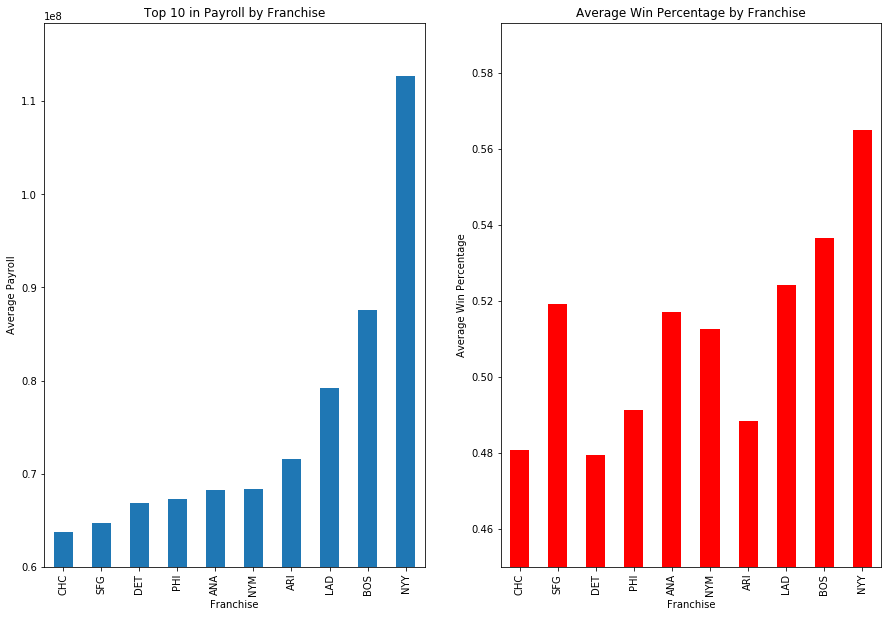

In [269]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
top_10_teams['Salary'].plot(kind='bar')
plt.ylabel('Average Payroll')
plt.xlabel('Franchise')
plt.title('Top 10 in Payroll by Franchise')
plt.ylim(60000000)
plt.subplot(1,2,2)
top_10_teams['Win Percentage'].plot(kind='bar', color ='red')
plt.ylabel('Average Win Percentage')
plt.xlabel('Franchise')
plt.title('Average Win Percentage by Franchise')
plt.ylim(.45)

(0.45, 0.54705318810121639)

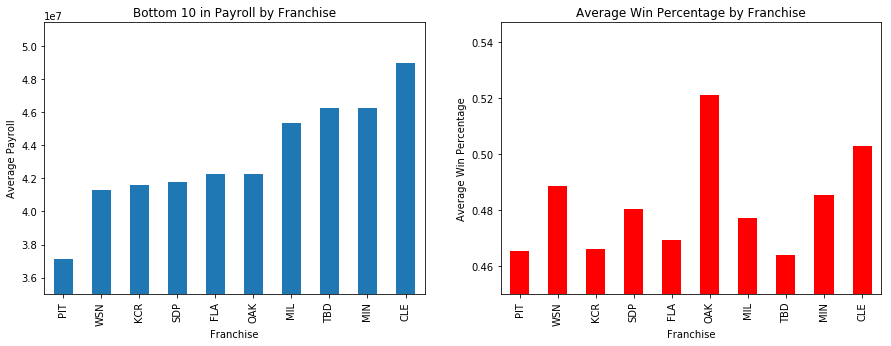

In [274]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bottom_10_teams['Salary'].plot(kind='bar')
plt.ylabel('Average Payroll')
plt.xlabel('Franchise')
plt.title('Bottom 10 in Payroll by Franchise')
plt.ylim(35000000)
plt.subplot(1,2,2)
bottom_10_teams['Win Percentage'].plot(kind='bar', color ='red')
plt.ylabel('Average Win Percentage')
plt.xlabel('Franchise')
plt.title('Average Win Percentage by Franchise')
plt.ylim(.45)

Payroll has an obvious connection towards winning, as it has a significant impact on homeruns which impacts offensive production. The above bar chart's display the top 10 and bottom 10 franchises in payroll, along with their average winning percentage. The New York Yankees (NYY) outspend every team on average, which has led to the highest average winning percentage compared to everyone else. Payroll also seriously handicaps a team, which has led to Pittsburgh(PIT) having the lowest win percentage out of the bottom 10 teams in payroll. Payroll doesn't guarantee wins, which happens to the be the case for Detriot (DET) and Chicago(CHC), both with win percentages less than 50%. MLB has implemented rule's to even out competitive balance within the league, but a smart front office can be just as effective as a team with an high payroll. The San Francisco Giants(SFG) have 8th highest payroll, but still manage to have a win percentage on par with the LA Dodgers (LAD). The most impresive organization is the Oakland A's, which have the 6th lowest payroll in all of baseball, but are still able to maintain a win percentage above 50% even with their financial handicap. 

#Proposed Further Research

While analysis into post season success and payroll can help us analyze important facotrs in a franchise, there are many more questions statistical analysis should be used to answer.

1) How closely can one predict a team's Win/Loss total at the end of the year using advanced stat's to compare a current roster to previous years? Front office's need to know before the season how good their team is, before, during, and even after the season to map out a plan for the on coming years. With development of advanced stats in MLB rosters, the ability to build a model for team projection is very possible.

2) Understanding payroll restrictions, how can team's achieve post season success while also being financially flexible? A deep dive into salary distribution by position can help discover how team's can find undervalued players and maximize their potential to build a roster that can adjust quickly if star level talent get's paid by another franchise. 